In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [73]:
data = pd.read_excel('/Users/parvezshahshaik/Documents/Github/restaurant_recommendation/restaurent_data/data.xlsx')

In [74]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [75]:
data.columns = data.columns.str.replace(' ','_')

In [76]:
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [77]:
#This is useful for identifying how many zeros exist in each column of your dataset.
(data == 0).sum()

Restaurant_ID              0
Restaurant_Name            0
Country_Code               0
City                       0
Address                    0
Locality                   0
Locality_Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average_Cost_for_two      18
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Price_range                0
Aggregate_rating        2148
Rating_color               0
Rating_text                0
Votes                   1094
dtype: int64

## Missing values for Latitude and Longitude

In [78]:
missing_city = data[(data.Longitude ==0) | (data.Latitude ==0)].City.unique()
len(missing_city)

28

In [79]:
# Calculate the mean Latitude and Longitude for each City, filter for missing cities
lat_n_long = data.groupby('City').agg({"Latitude":"mean", "Longitude":"mean"}).loc[missing_city]

# Create a dictionary with missing city locations
missing_city_loc = {x: tuple(lat_n_long.loc[x]) for x in missing_city}

# Count the number of rows where Latitude or Longitude is 0
missing_coords_count = ((data.Latitude == 0) | (data.Longitude == 0)).sum()

missing_coords_count


499

In [80]:
len(lat_n_long)

28

In [81]:
for i in data.index:
    if (data.loc[i, 'Latitude'] == 0) or (data.loc[i, 'Longitude'] == 0):
        city = data.loc[i, 'City']
        lat, long = missing_city_loc[city]
        data.loc[i, 'Latitude'] = lat
        data.loc[i, 'Longitude'] = long

In [82]:
print('Any Duplicated Rows ? :' , data.duplicated().any())
print('No. of Duplicated Rows :', data.duplicated().sum())

Any Duplicated Rows ? : False
No. of Duplicated Rows : 0


In [83]:
data.duplicated('Restaurant_ID').any()

False

In [84]:
print('No. of unique Restaurant_IDs   :', data.Restaurant_ID.nunique())
print('No. of unique Restaurant_Names :', data.Restaurant_Name.nunique())

No. of unique Restaurant_IDs   : 9551
No. of unique Restaurant_Names : 7445


In [85]:
country_code = pd.read_excel('/Users/parvezshahshaik/Documents/Github/restaurant_recommendation/restaurent_data/Country-Code.xlsx')
country_code.columns = country_code.columns.str.replace(' ','_')

In [86]:
data = pd.merge(data,country_code, on = 'Country_Code')

## Finding the cities with minimum and maximum number of restaurents
This line of code is responsible for placing annotations on the countplot bars. It retrieves the percentage value from the vc.Perc column for each country, formats it as a string with a percentage symbol, and positions it slightly to the left of the bar's center (along the x-axis) and slightly above the bar's mid-height (along the y-axis). These annotations display the percentage values on the countplot, providing additional information about the distribution of countries in the dataset.

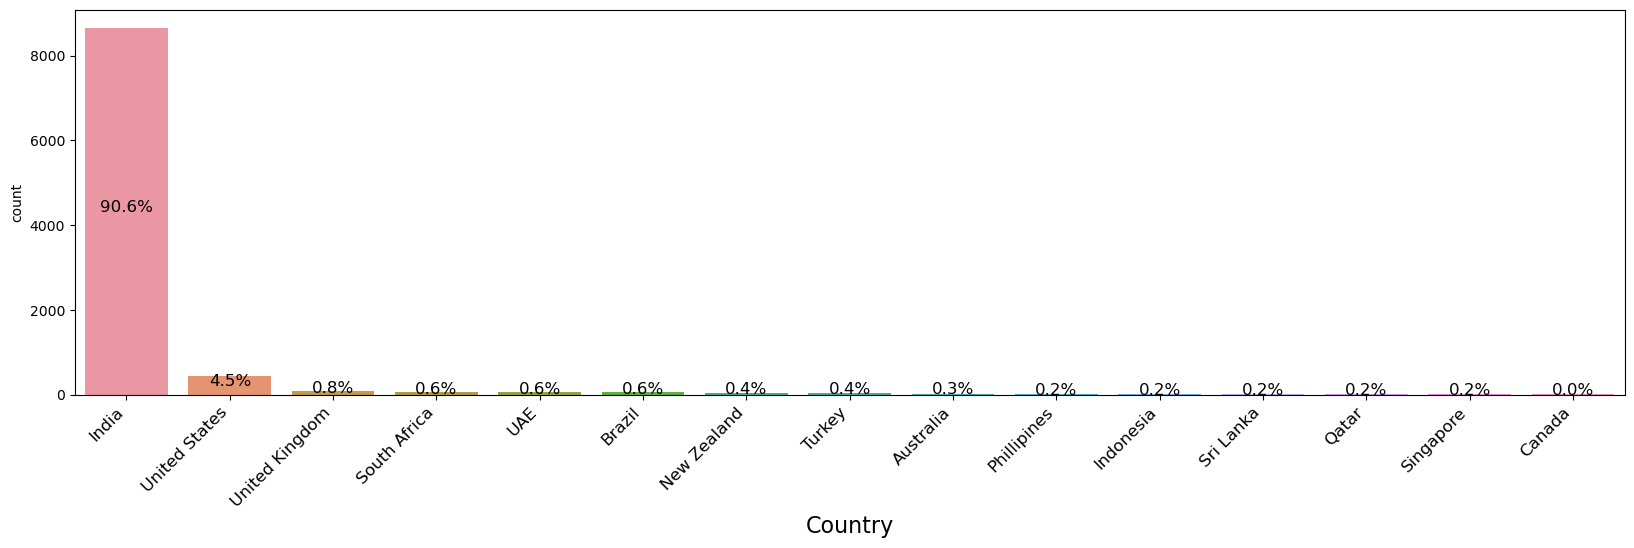

In [87]:
plt.figure(figsize=(20, 5))

# Count the occurrences of each country in the 'Country' column
vc = data['Country'].value_counts().reset_index()
vc.columns = ['Country', 'Freq']

# Calculate percentages
vc['Perc'] = (vc['Freq'] / vc['Freq'].sum() * 100).round(1)

# Create the countplot
sns.countplot(x='Country', data=data, order=vc['Country'])

# Annotate the plot with percentages
for i, row in vc.iterrows():
    plt.annotate(str(row['Perc']) + '%', xy=(i, row['Freq'] / 2), ha='center', fontsize=12)

plt.xticks(rotation=45, ha='right', size=12)
plt.xlabel('Country', size=16)
plt.show()


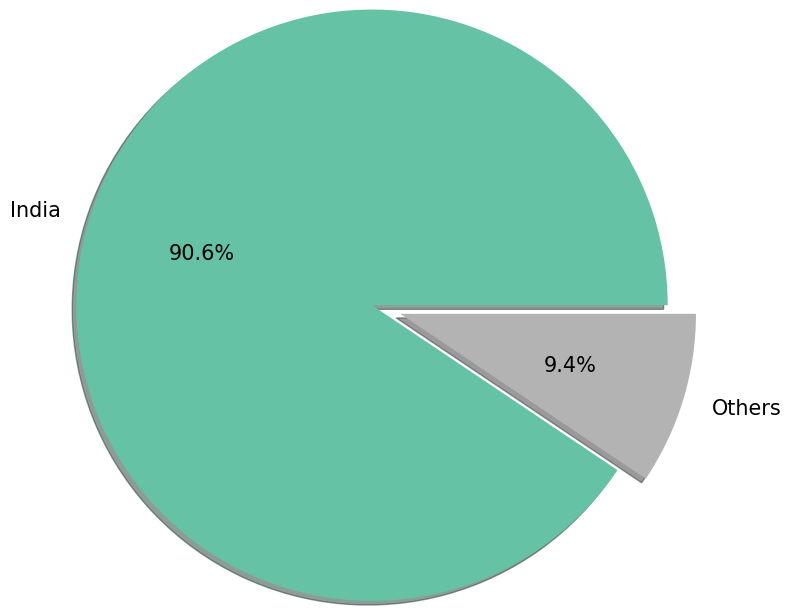

In [88]:
vc = pd.Series()
vc['India'] = len(data[data.Country == 'India'])
vc['Others'] = len(data[data.Country != 'India'])
vc.plot.pie(radius = 2,autopct = '%1.1f%%' , textprops = {'size':15 }, explode= [0.1,0.1], shadow = True, cmap ='Set2')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.show()

In [89]:
data = data[data.Country == 'India']


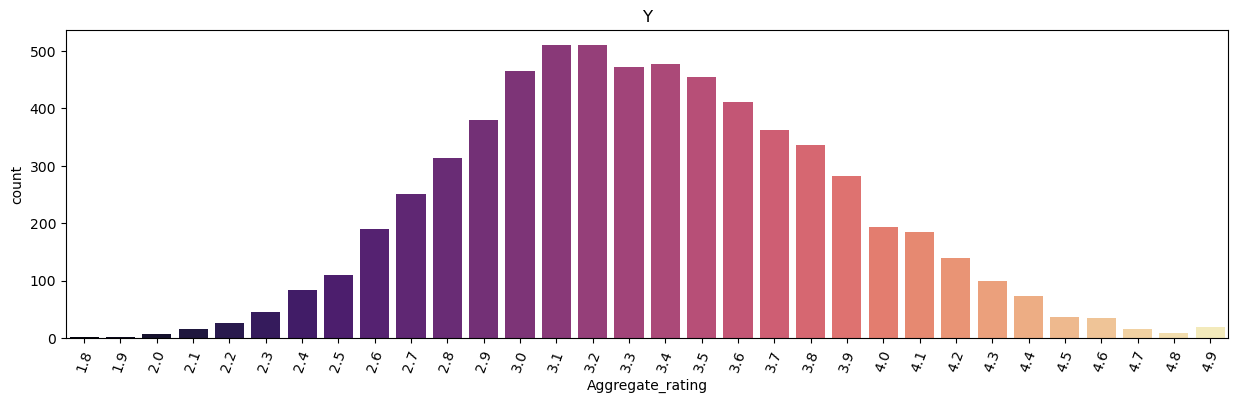

In [90]:
plt.figure(figsize=(15, 4))
sns.countplot(x='Aggregate_rating', 
              data=data[data['Aggregate_rating'] != 0], 
              palette='magma') 
plt.xticks(rotation=70) 
plt.title('Y')
plt.show()


In [91]:
data["Rating_color"].value_counts()
Color_represents = data.groupby(['Rating_color'],as_index =False)['Aggregate_rating'].mean()

In [92]:
Color_represents.columns = ['Rating_color','Average_rating']

In [93]:
Color_represents =Color_represents.sort_values(by='Average_rating',ascending=False)

In [94]:
Color_represents = Color_represents[0:5]
Color_represents['Ratings']  = ['Excellent','Very Good','Good','Okay','Poor']

In [95]:
Color_represents

,Rating_color,Average_rating,Ratings
0,Dark Green,4.646552,Excellent
1,Green,4.153324,Very Good
5,Yellow,3.677423,Good
2,Orange,3.048722,Okay
3,Red,2.296111,Poor


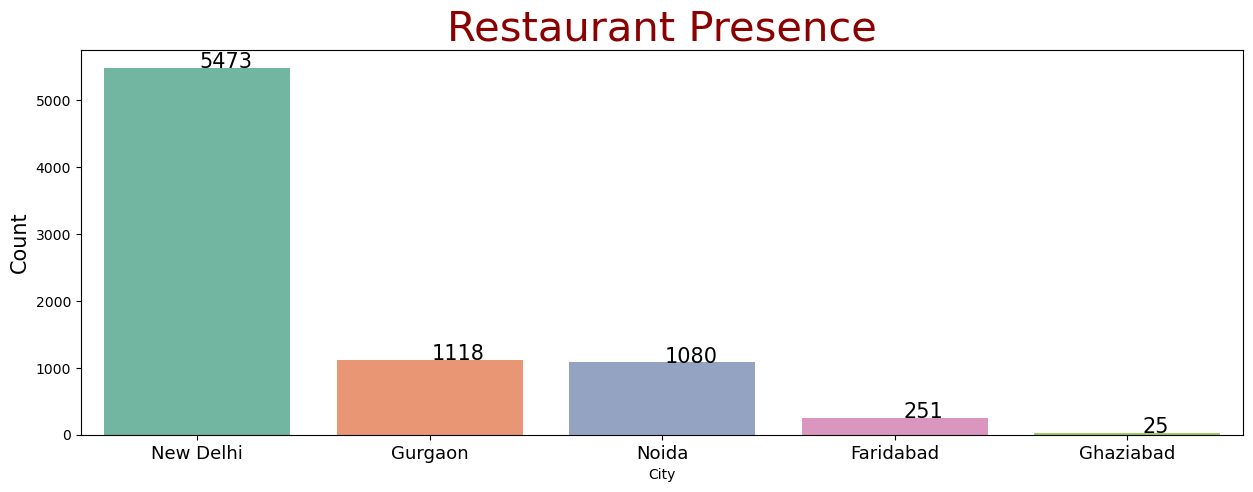

In [96]:
plt.figure(figsize=(15, 5))
vc = data['City'].value_counts()[:5]
g = sns.barplot(x=vc.index, y=vc.values, palette='Set2') 
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
for i in range(5):
    value = vc[i]
    g.text(y=value - 2, x=i + 0.125, s=value, color='black', ha="center", fontsize=15)
g.set_ylabel('Count', fontsize=15)
g.set_title('Restaurant Presence', fontsize=30, color='darkred')
plt.show()


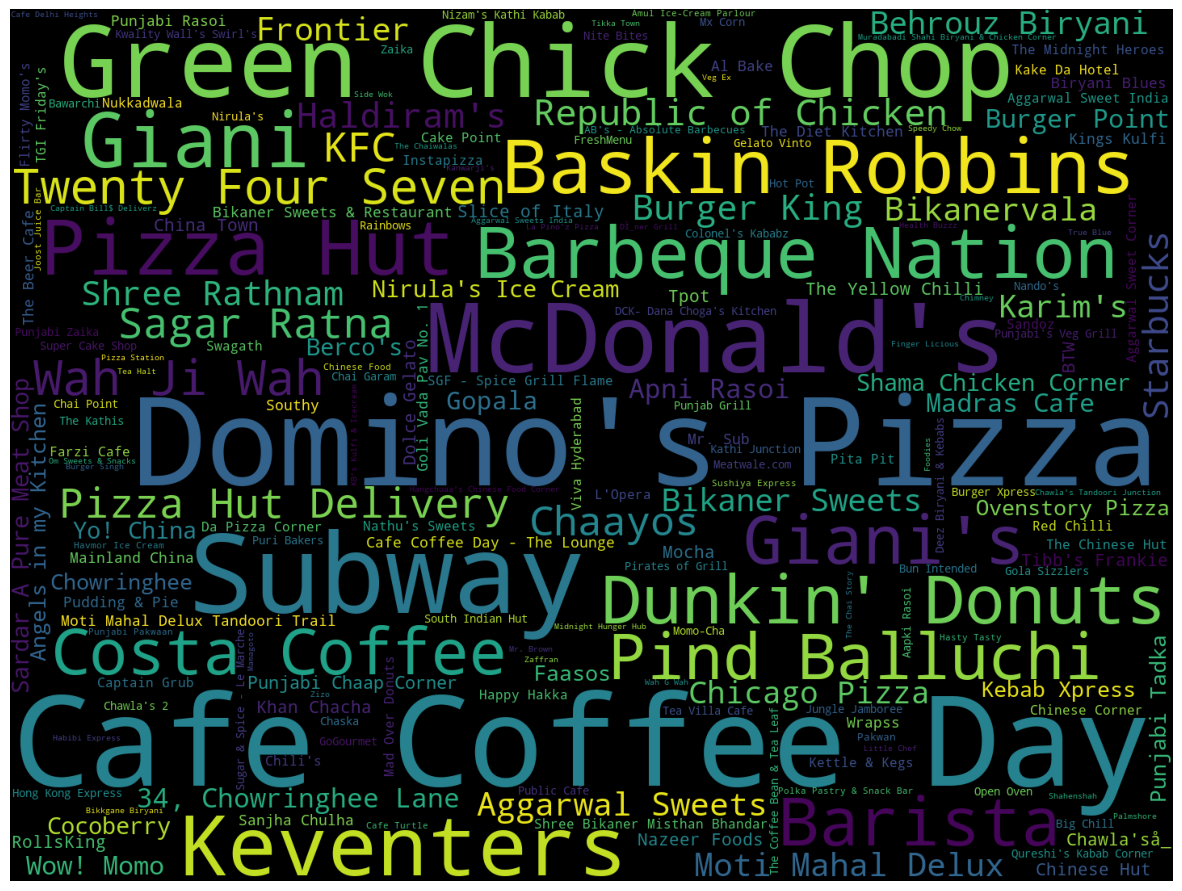

In [97]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5,
                       stopwords=stopwords).generate_from_frequencies(data['Restaurant_Name'].value_counts()))
fig = plt.figure(1,figsize=(15, 15)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

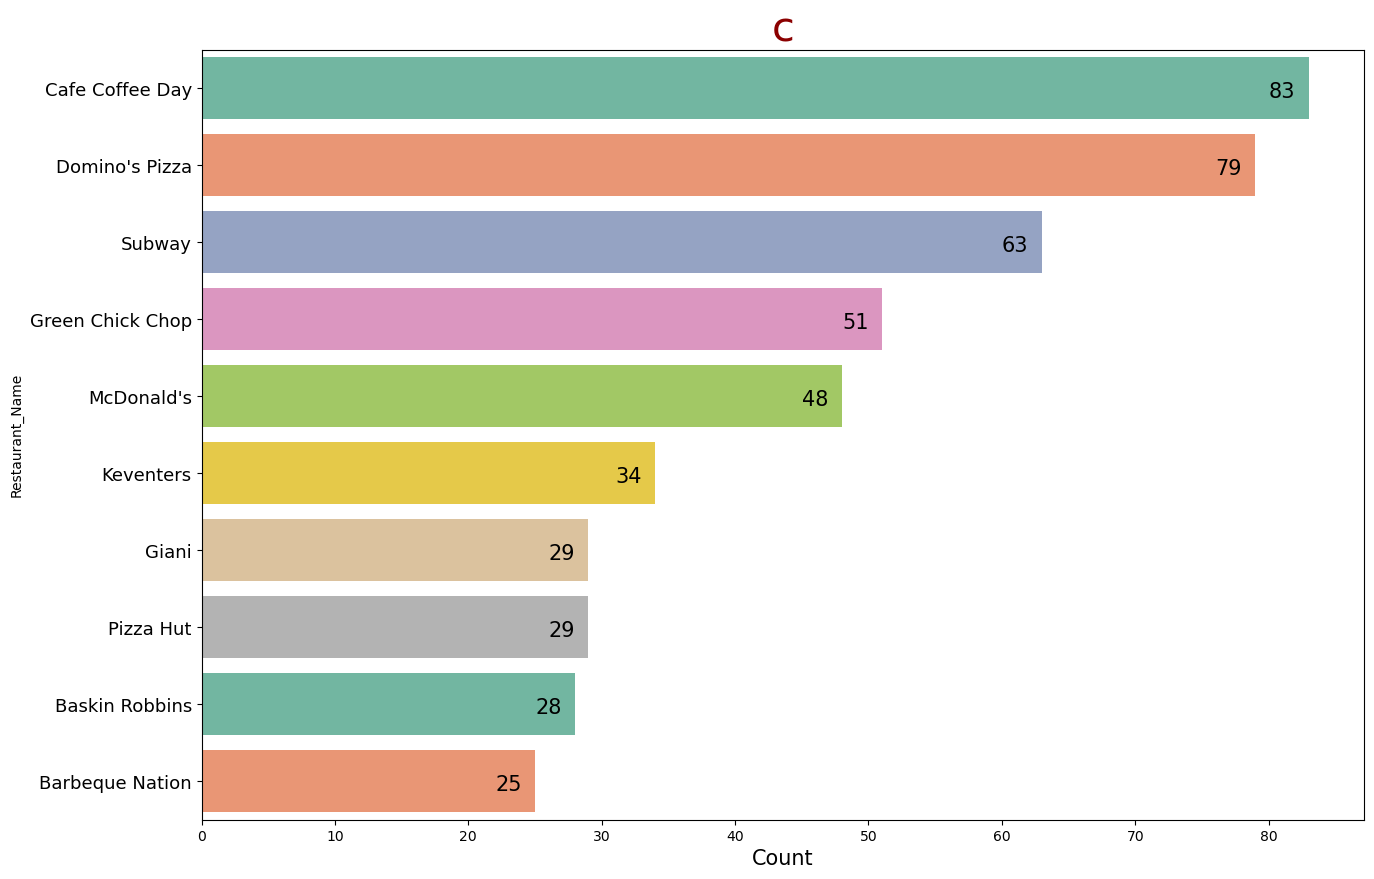

In [98]:
plt.figure(figsize=(15, 10))
vc = data['Restaurant_Name'].value_counts()[:10]
g = sns.barplot(y=vc.index, x=vc.values, palette='Set2')
g.set_yticklabels(g.get_yticklabels(), fontsize=13)

for i in range(10):
    value = vc[i]
    g.text(x=value - 2, y=i + 0.125, s=value, color='black', ha="center", fontsize=15)

g.set_xlabel('Count', fontsize=15)
g.set_title('c', fontsize=30, color='darkred')

plt.show()


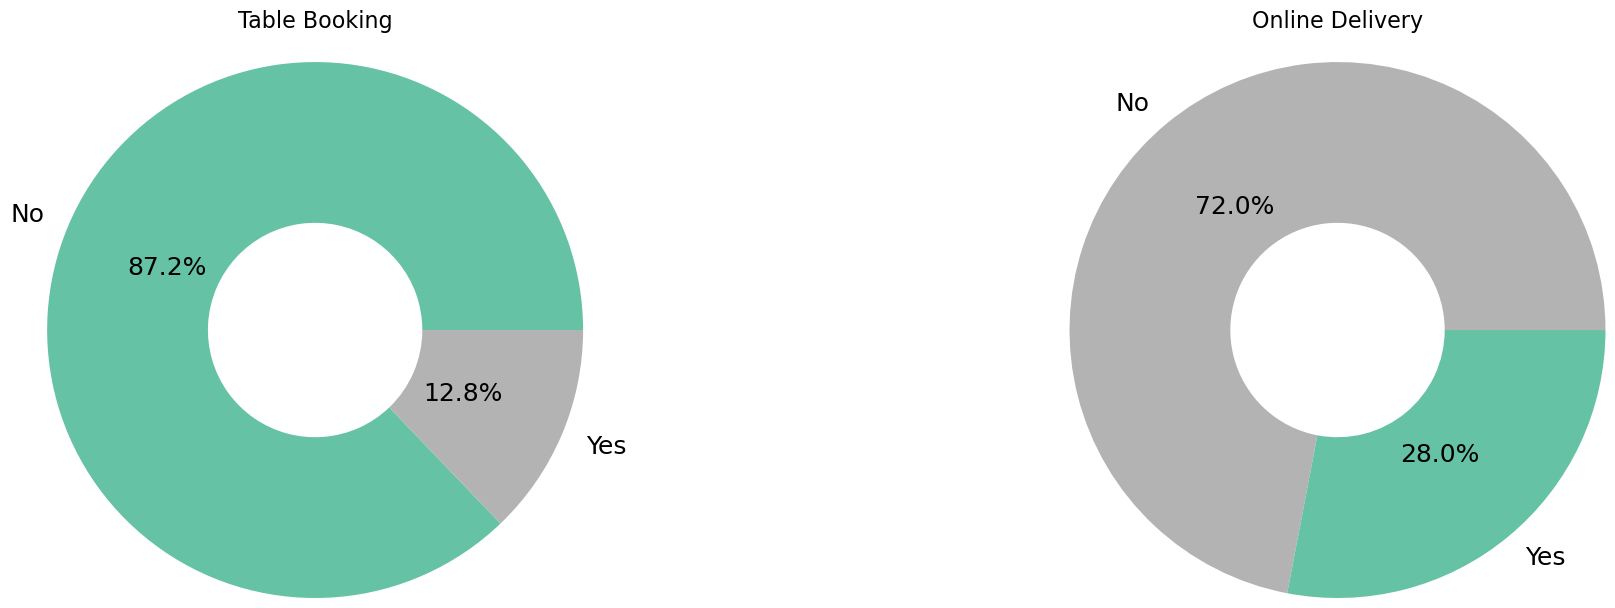

In [99]:
f, axes = plt.subplots(1, 2, figsize=(20, 7))

data['Has_Table_booking'].value_counts().plot.pie(ax=axes[0], autopct='%0.1f%%', radius=1.25,
                                                  wedgeprops={'width': 0.75}, cmap='Set2',
                                                  textprops={'size': 18})
axes[0].set_title('Table Booking\n', fontsize=16)
axes[0].set_ylabel('')

data['Has_Online_delivery'].value_counts().plot.pie(ax=axes[1], autopct='%0.1f%%', radius=1.25,
                                                    wedgeprops={'width': 0.75}, cmap='Set2_r',
                                                    textprops={'size': 18})
axes[1].set_title('Online Delivery\n', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout(w_pad=20, h_pad=10, pad=4)
plt.show()

                                                 

In [100]:
pd.crosstab(data.Has_Online_delivery,data.Has_Table_booking)

Has_Table_booking,No,Yes
Has_Online_delivery,,
No,5545,684
Yes,1996,427


In [101]:
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2

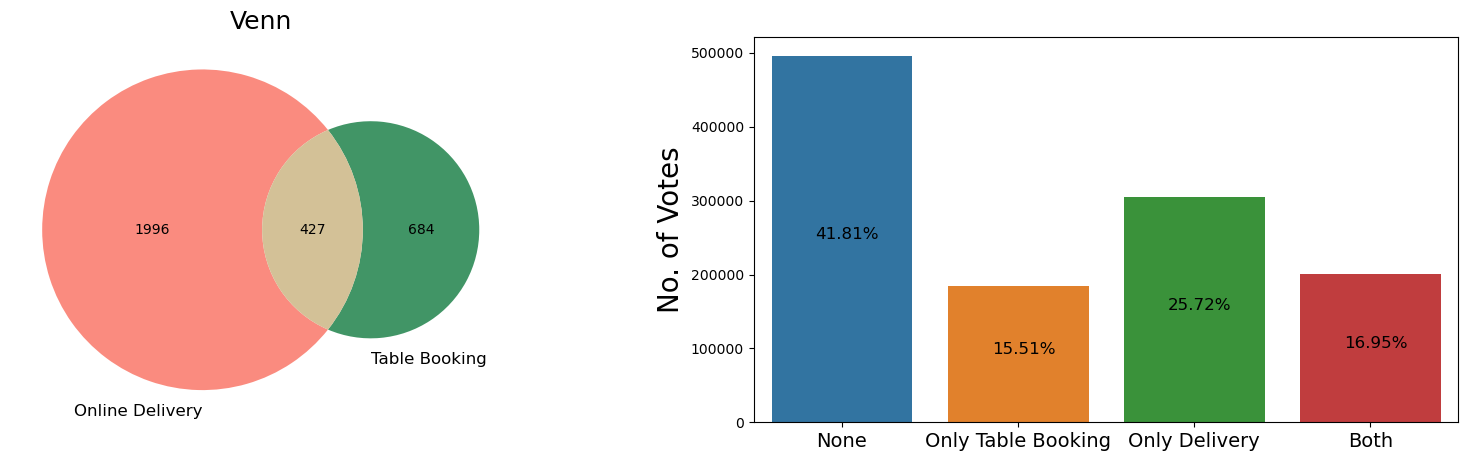

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
s1 = set(data[data['Has_Online_delivery'] == 'Yes']['Restaurant_ID'])
s2 = set(data[data['Has_Table_booking'] == 'Yes']['Restaurant_ID'])
out = venn2([s1, s2], ['Online Delivery', 'Table Booking'], ['salmon', 'seagreen'], alpha=0.91, ax=ax[0])
ax[0].set_title('Venn', fontsize=18)

dc = data.pivot_table(index=['Has_Online_delivery', 'Has_Table_booking'], values='Votes', aggfunc='sum')
dc.index = ['None', 'Only Table Booking', 'Only Delivery', 'Both']
dc['Perc'] = (dc['Votes'] / dc['Votes'].sum() * 100).round(2)

sns.barplot(x=dc.index, y=dc['Votes'], ax=ax[1])
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('')

for i in range(len(dc)):
    plt.annotate(str(dc['Perc'].iloc[i]) + '%', xy=(i - 0.15, int(dc['Votes'].iloc[i] / 2)), fontsize=12)

plt.ylabel('No. of Votes', fontsize=20)
plt.show()


In [103]:
dc

,Votes,Perc
None,496366,41.81
Only Table Booking,184183,15.51
Only Delivery,305369,25.72
Both,201245,16.95


<Axes: xlabel='Aggregate_rating'>

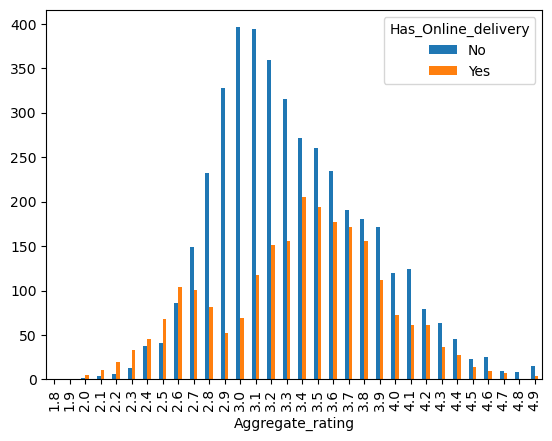

In [104]:
d = data[data.Aggregate_rating != 0]
pd.crosstab(d.Aggregate_rating, d.Has_Online_delivery).plot.bar()

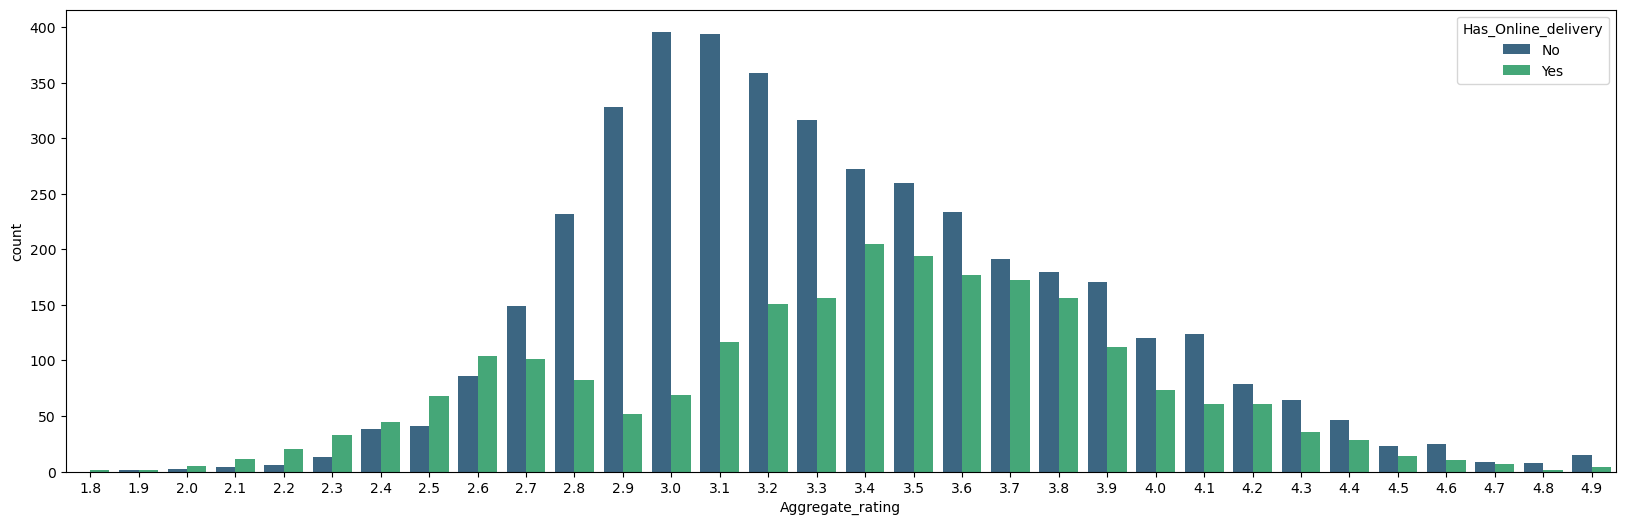

In [105]:
plt.figure(figsize=(20,6))
sns.countplot(data=data[data.Aggregate_rating !=0],
x='Aggregate_rating',hue='Has_Online_delivery',palette='viridis') 
plt.show()

In [106]:
top10 = data.City.value_counts()[:10]
top10[:2]

City
New Delhi    5473
Gurgaon      1118
Name: count, dtype: int64

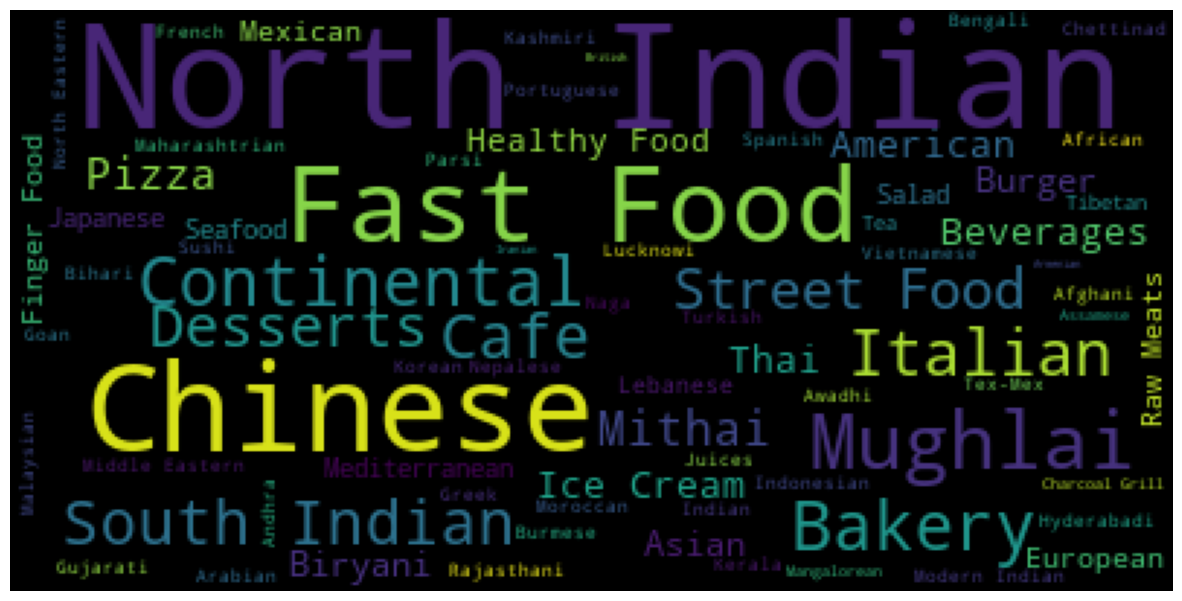

In [107]:
l = []
for i in data['Cuisines'].str.split(','):
    l.extend(i)

s = pd.Series([i.strip() for i in l])

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate_from_frequencies(s.value_counts())

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


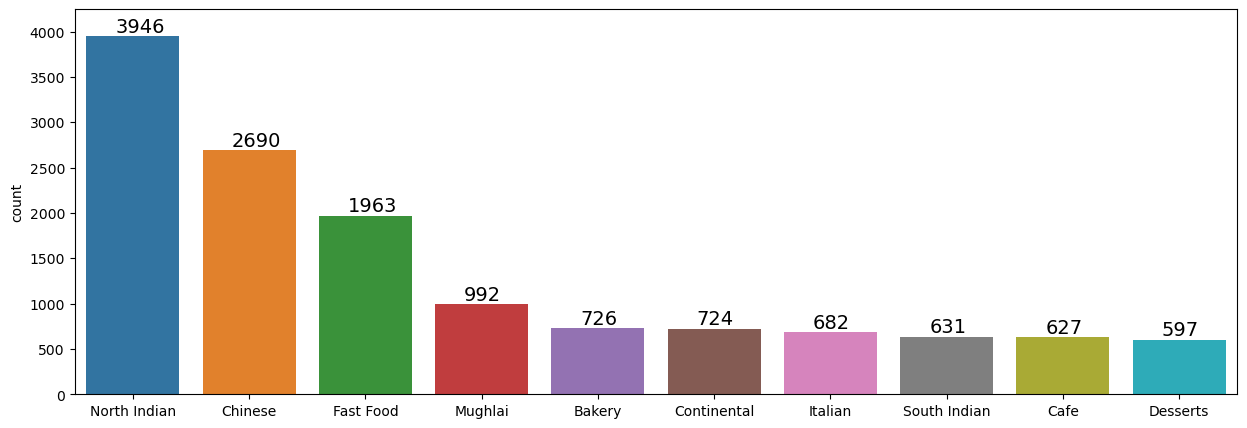

In [108]:
plt.figure(figsize=(15, 5))
sns.barplot(x=s.value_counts()[:10].index, y=s.value_counts()[:10])

for i in range(10):
    plt.annotate(s.value_counts()[i], xy=(i - 0.15, s.value_counts()[i] + 50), fontsize=14)

plt.ylim(0, round(s.value_counts()[0] + 300))
plt.show()


In [109]:
data['no_cuisines'] = data.Cuisines.str.split(',').apply(len)

In [110]:
plt.figure(figsize = (15,5))
vc = data.no_cuisines.value_counts() sns.countplot('no_cuisines', data=data, order = vc.index) for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy = (i-0.07,vc.iloc[i]+10), fontsize = 12)
plt.show()

SyntaxError: invalid syntax (929114487.py, line 2)

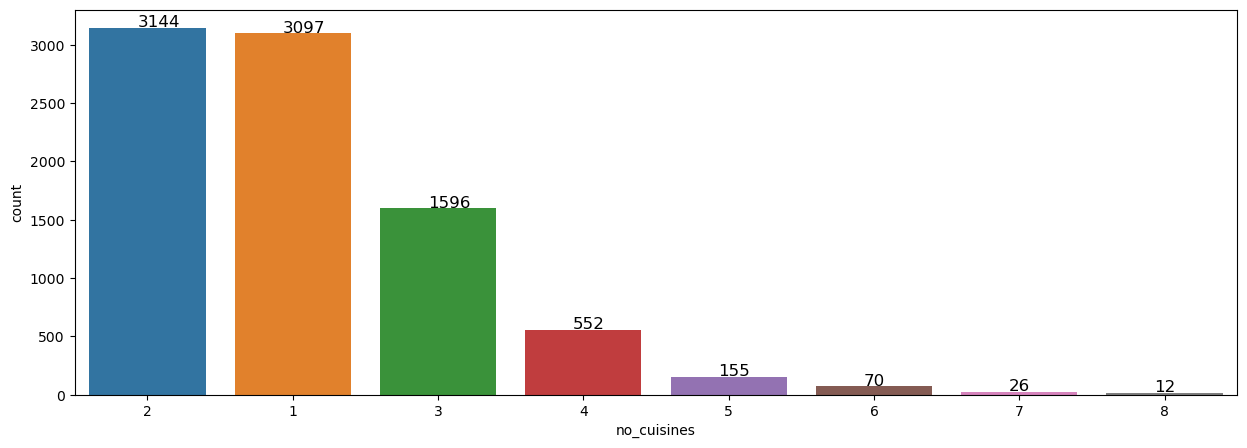

In [111]:
plt.figure(figsize=(15, 5))
vc = data['no_cuisines'].value_counts() 
sns.countplot(x='no_cuisines', data=data, order=vc.index)

for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy=(i - 0.07, vc.iloc[i] + 10), fontsize=12)

plt.show()


In [112]:
 data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country', 'no_cuisines'],
      dtype='object')

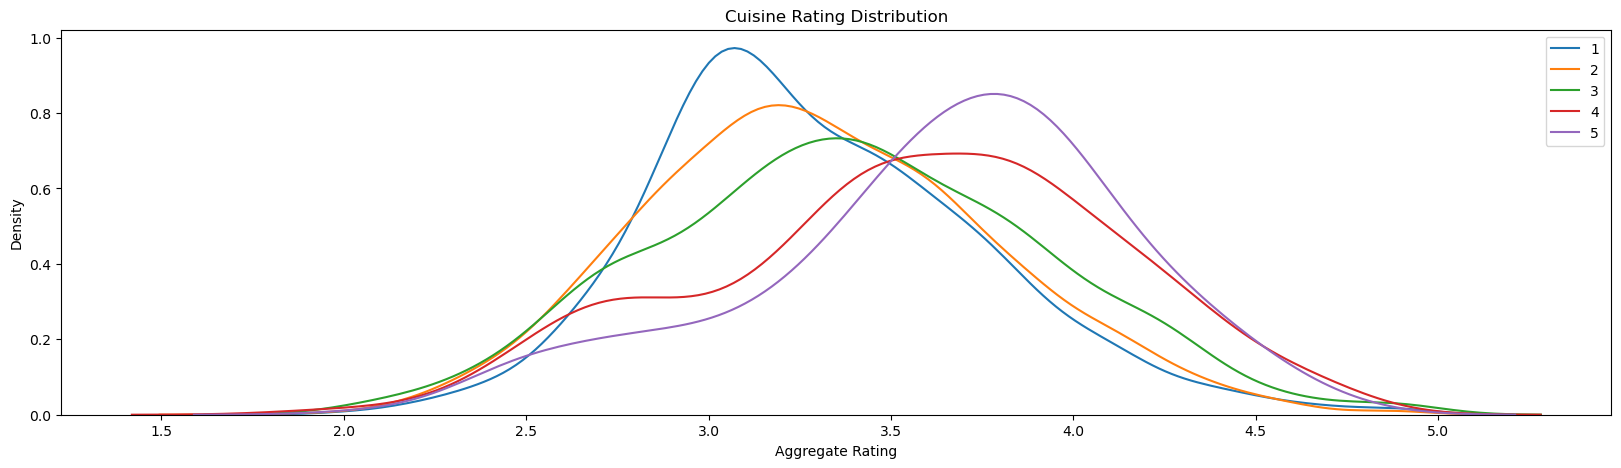

In [113]:
plt.figure(figsize=(20, 5))

fusion_rate = data.loc[data['Aggregate_rating'] > 0, ['no_cuisines', 'Aggregate_rating']].copy()
fusion_rate.loc[fusion_rate['no_cuisines'] > 5, 'no_cuisines'] = 5
fusion_rate = fusion_rate.loc[fusion_rate['Aggregate_rating'] != -1, :]

pal = sns.color_palette('Oranges', 11)
for i in range(1, 6):
    num_ix = fusion_rate['no_cuisines'] == i
    sns.distplot(fusion_rate.loc[num_ix, 'Aggregate_rating'], label=str(i), hist=False)

plt.legend()
plt.title('Cuisine Rating Distribution')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.show()


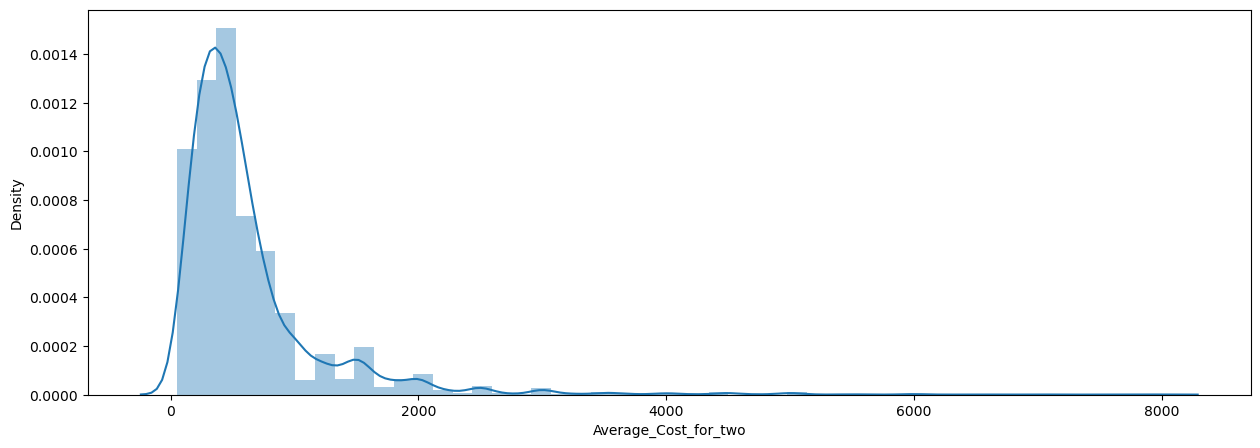

In [122]:
plt.figure(figsize = (15,5))
sns.distplot(data[data.Average_Cost_for_two != 0].Average_Cost_for_two)
plt.show()